# ICV_Question 2

In [1]:
## import necessary libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import figure
import matplotlib.image as mpimg


In [2]:
# get name of images
import os
jpg_files = []
for root, dirs, files in os.walk("."):
    for filename in files:
        if "jpg" in filename:
            jpg_files.append(filename)

## Part A

In [3]:
# function takes an image and convolution kernel. Does filtering and returns image
def ICV_convolution(image,kernel,border_control):
    im_width,im_height = image.shape[0],image.shape[1]
    k_width,k_height = kernel.shape[0],kernel.shape[1]
    
    # compute number of pixels to ignore based on kernel dimensions
    width_ignore = int(k_width/2)
    height_ignore = int(k_height/2)
    new_image = np.zeros(image.shape)
    
    # create an extended old image for handling border issues
    extended_img = np.copy(image)
    
    # based on type of padding 
    # the matrix to pad will change based on type of control we want at image border
    if border_control == "zeros":
        to_pad_col_1 = np.zeros((image.shape[0],width_ignore,3)).astype(int)
        to_pad_col_2 = np.copy(to_pad_col_1)
        
        to_pad_row_1 = np.zeros((height_ignore,image.shape[1]+width_ignore*2,3)).astype(int)
        to_pad_row_2 = np.copy(to_pad_row_1)
        
    if border_control == "periodic":
        to_pad_col_1 = image[:,:width_ignore,:]
        to_pad_col_2 = image[:,-width_ignore:,:]
        
        to_pad_row_1 = np.zeros((height_ignore,image.shape[1]+width_ignore*2,3)).astype(int)
        to_pad_row_1[:,width_ignore:-width_ignore,:] = image[:height_ignore,:,:]
        
        to_pad_row_2 = np.zeros((height_ignore,image.shape[1]+width_ignore*2,3)).astype(int)
        to_pad_row_2[:,width_ignore:-width_ignore,:] = image[-height_ignore:,:,:]
        
    if border_control == "mirror":
        to_pad_col_1_temp = image[:,:width_ignore,:]
        to_pad_col_2_temp = image[:,-width_ignore:,:]
        
        to_pad_col_1 = to_pad_col_1_temp.copy()
        to_pad_col_2 = to_pad_col_2_temp.copy()
        
        for k in range(to_pad_col_1_temp.shape[1]):
            to_pad_col_1[:,-(k+1),:] = to_pad_col_1_temp[:,k,:]
            to_pad_col_2[:,-(k+1),:] = to_pad_col_2_temp[:,k,:]
        
        to_pad_row_1_temp = np.zeros((height_ignore,image.shape[1]+width_ignore*2,3)).astype(int)
        to_pad_row_1_temp[:,width_ignore:-width_ignore,:] = image[:height_ignore,:,:]
        
        to_pad_row_2_temp = np.zeros((height_ignore,image.shape[1]+width_ignore*2,3)).astype(int)
        to_pad_row_2_temp[:,width_ignore:-width_ignore,:] = image[-height_ignore:,:,:]
        
        to_pad_row_1 = to_pad_row_1_temp.copy()
        to_pad_row_2 = to_pad_row_2_temp.copy()
        
        for k in range(to_pad_row_1_temp.shape[0]):
            to_pad_row_1[-(k+1),:,:] = to_pad_row_1_temp[k,:,:]
            to_pad_row_2[-(k+1),:,:] = to_pad_row_2_temp[k,:,:]
        
    # stack columns
    extended_img = np.hstack((to_pad_col_1,image))
    extended_img = np.hstack((extended_img,to_pad_col_2))
    # stack rows
    extended_img = np.vstack((to_pad_row_1,extended_img))
    extended_img = np.vstack((extended_img,to_pad_row_2))
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            im_crop = extended_img[i:i+k_width,j:j+k_height]
            new_image[i,j,0],new_image[i,j,1],new_image[i,j,2] = np.sum(np.multiply(im_crop[:,:,0],kernel)),np.sum(np.multiply(im_crop[:,:,1],kernel)),np.sum(np.multiply(im_crop[:,:,2],kernel))

    return new_image,extended_img
        

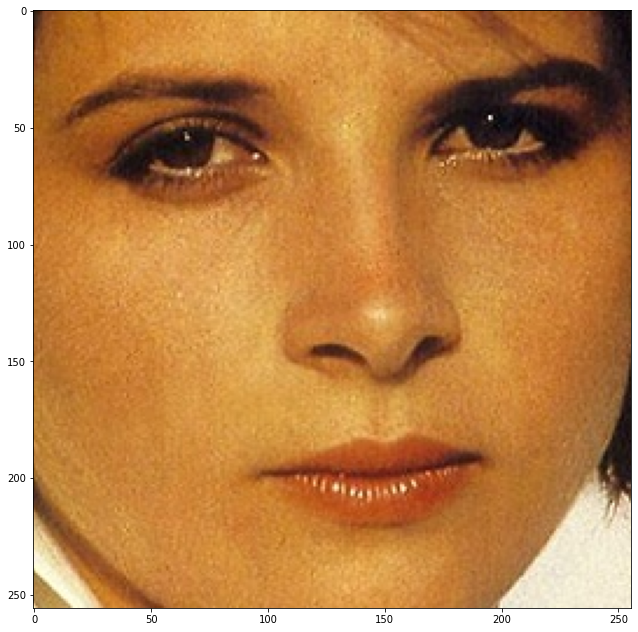

In [7]:
figure(figsize=(14, 11))
img = cv2.imread('DatasetA/'+jpg_files[0])
# as opencv loads in BGR format by default, we want to show it in RGB.
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [8]:
# define kernels
avg_kernel = np.matrix([[1, 1, 1],[1, 1 ,1],[1 ,1 ,1]])/9.0
gauss_kernel = np.matrix([[1, 2, 1],[2, 4 ,2],[1 ,2 ,1]])/16.0
gradient_kernel = np.matrix([[0, 1, 0],[1, -4 ,1],[0 ,1 ,0]])

## test different methods for dealing with border (pad with zeros, periodic and mirror)

In [10]:
# analyse with an extreme case where the kernel is big
big_kernel = np.ones((21,21))/21/21
img_output_avg_zeros,extended_img_zeros = ICV_convolution(img,big_kernel,"zeros")
img_output_avg_periodic,extended_img_periodic = ICV_convolution(img,big_kernel,"periodic")
img_output_avg_mirror,extended_img_mirror = ICV_convolution(img,big_kernel,"mirror")

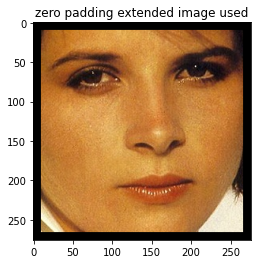

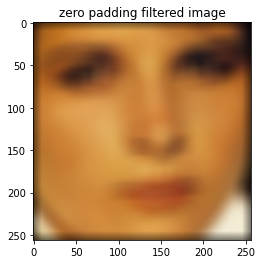

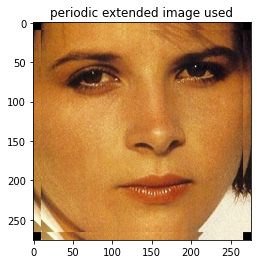

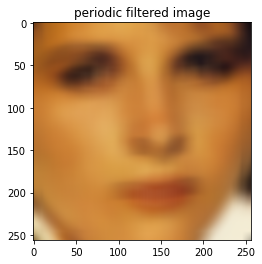

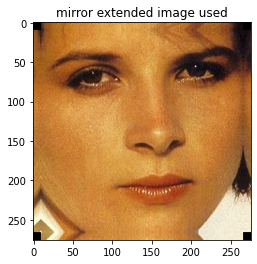

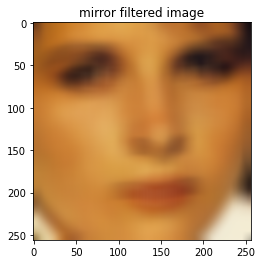

In [13]:
# different border handling and their results 
imgplot = plt.imshow(extended_img_zeros)
plt.title("zero padding extended image used")
plt.show()
imgplot = plt.imshow(img_output_avg_zeros/255)
plt.title("zero padding filtered image")
plt.show()

imgplot = plt.imshow(extended_img_periodic)
plt.title("periodic extended image used")
plt.show()
imgplot = plt.imshow(img_output_avg_periodic/255)
plt.title("periodic filtered image")
plt.show()

imgplot = plt.imshow(extended_img_mirror)
plt.title("mirror extended image used")
plt.show()
imgplot = plt.imshow(img_output_avg_mirror/255)
plt.title("mirror filtered image")
plt.show()

## Part B

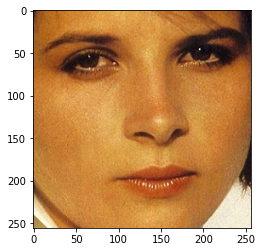

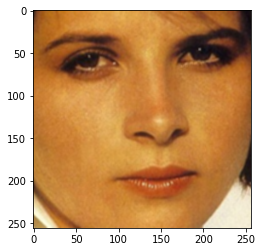

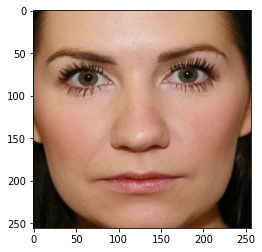

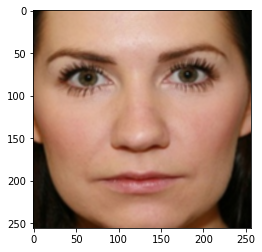

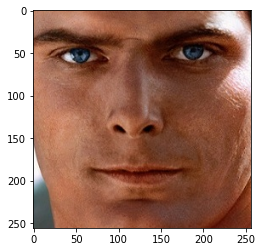

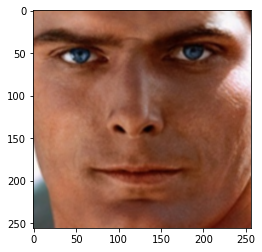

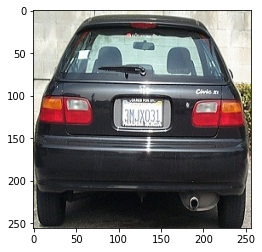

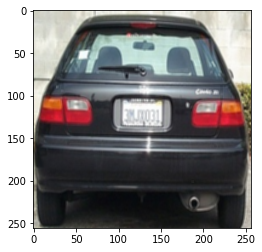

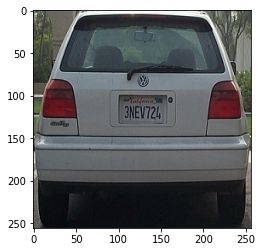

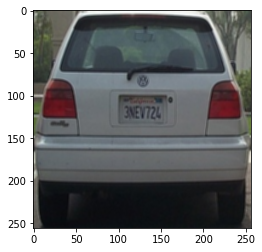

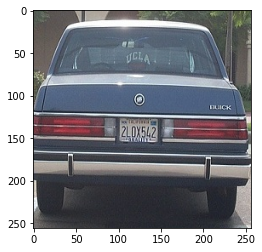

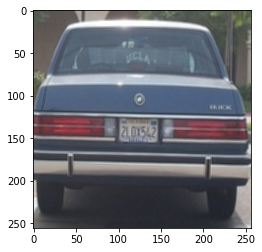

In [12]:
for img_name in jpg_files:
    img = cv2.imread('DatasetA/' + img_name)
    # as opencv loads in BGR format by default, we want to show it in RGB.
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    imgplot = plt.imshow(img/255)
    plt.show()
    
    img_output_avg,ext_img= ICV_convolution(img,avg_kernel,"mirror")
#     figure(figsize=(14, 11))
    imgplot = plt.imshow(img_output_avg/255)
    plt.show()

## Part c

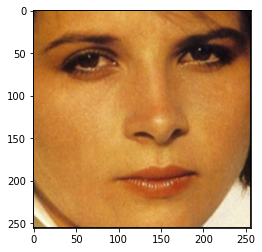

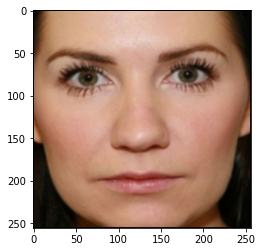

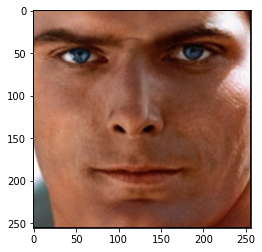

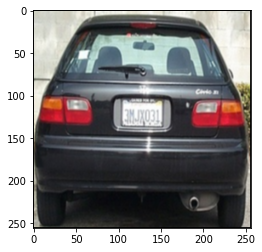

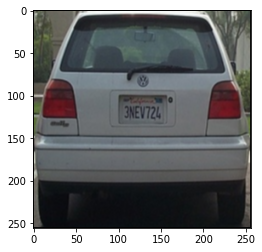

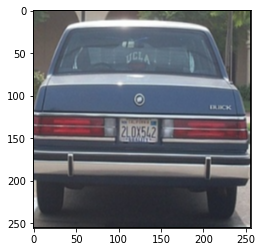

In [112]:
for img_name in jpg_files:
    img = cv2.imread('DatasetA/' + img_name)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_output_gauss= ICV_convolution(img,gauss_kernel,'mirror')
#     figure(figsize=(14, 11))
    imgplot = plt.imshow(img_output_gauss/255)
    plt.show()

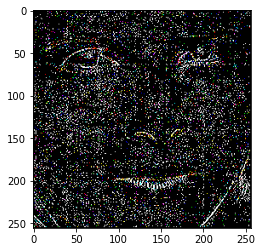

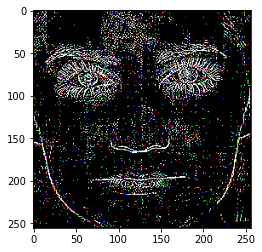

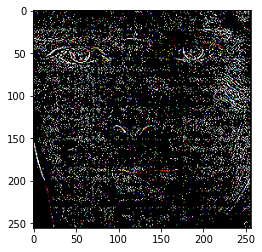

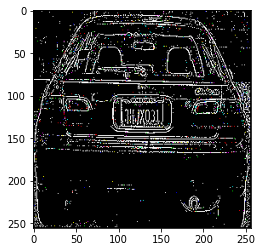

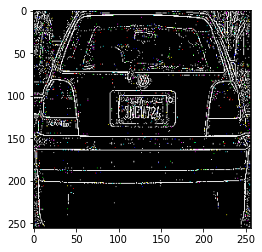

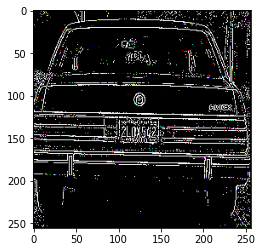

In [157]:
for img_name in jpg_files:
    img = cv2.imread('DatasetA/' + img_name)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_output_grad = ICV_convolution(img,gradient_kernel,'mirror')

#     normalized_img_output_grad = (img_output_grad - np.min(img_output_grad))/(np.max(img_output_grad)-np.min(img_output_grad))
    # let us assume 10% of pixels form edges in our images, according to that we find edges based on gradient value
    img_output_grad[img_output_grad<np.percentile(img_output_grad,90)]=0.0
    img_output_grad[img_output_grad>=np.percentile(img_output_grad,90)]=1.0
    imgplot = plt.imshow(img_output_grad)
    plt.show()


## Part D

### i)

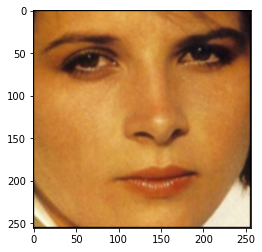

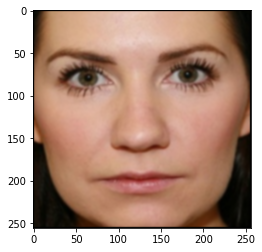

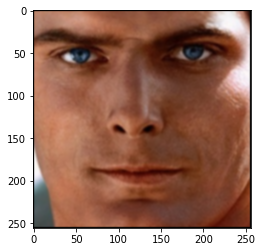

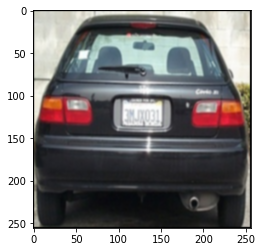

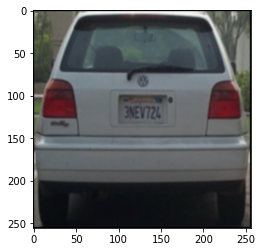

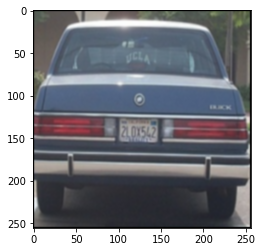

In [154]:
for img_name in jpg_files:
    img = cv2.imread('DatasetA/' + img_name)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    img_output_gauss= ICV_convolution(img,gauss_kernel,'mirror')
    img_output_gauss2= ICV_convolution(img_output_gauss,gauss_kernel,'mirror')
#     figure(figsize=(14, 11))
    imgplot = plt.imshow(img_output_gauss2/255)
    plt.show()

### ii)

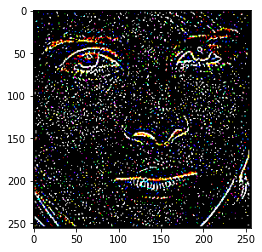

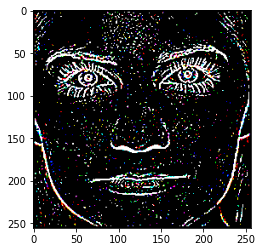

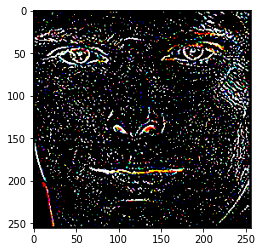

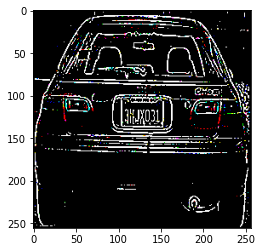

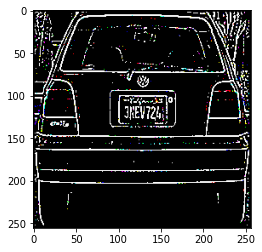

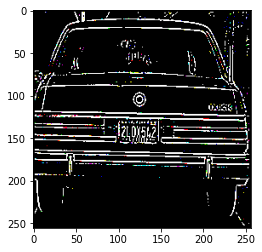

In [155]:
for img_name in jpg_files:
    img = mpimg.imread('DatasetA/'+img_name)
    img_output_gauss= ICV_convolution(img,gauss_kernel,'mirror')
    img_output_grad2= ICV_convolution(img_output_gauss,gradient_kernel,'mirror')
    
    # let us assume 10% of pixels form edges in our images, according to that we find edges based on gradient value
    img_output_grad2[img_output_grad2<np.percentile(img_output_grad2,90)]=0.0
    img_output_grad2[img_output_grad2>=np.percentile(img_output_grad2,90)]=1.0
    imgplot = plt.imshow(img_output_grad2)
    plt.show()

### iii)

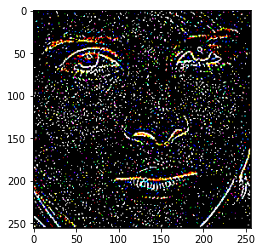

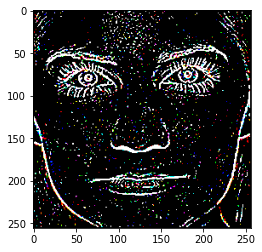

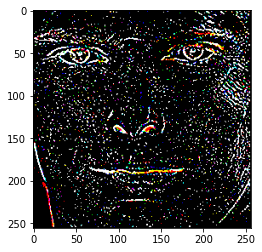

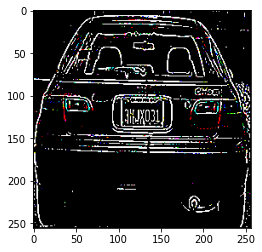

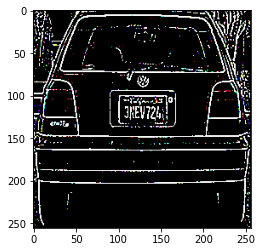

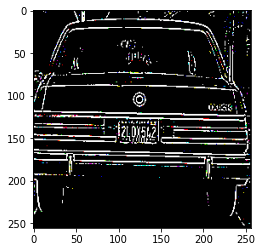

In [156]:
for img_name in jpg_files:
    img = mpimg.imread('DatasetA/'+img_name)
    img_output_grad= ICV_convolution(img,gradient_kernel,'mirror')
    img_output_gauss2= ICV_convolution(img_output_grad,gauss_kernel,'mirror')
    
    # let us assume 10% of pixels form edges in our images, according to that we find edges based on gradient value
    img_output_gauss2[img_output_gauss2<np.percentile(img_output_gauss2,90)]=0.0
    img_output_gauss2[img_output_gauss2>=np.percentile(img_output_gauss2,90)]=1.0
    imgplot = plt.imshow(img_output_gauss2)
    plt.show()